In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_excel("crop yield data sheet.xlsx")
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
df.shape

(109, 7)

In [5]:
df.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue         object
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

In [7]:
#converting the temp object to float datatype
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

In [8]:
# dropping":" from temp column
df = df[df['Temperatue']!=':']

In [10]:
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan],
      dtype=object)

In [11]:
#converting the temp column to float
df['Temperatue'] = df['Temperatue'].astype(float)

/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_65548/2957484629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperatue'] = df['Temperatue'].astype(float)


In [13]:
df['Temperatue'].dtypes

dtype('float64')

In [14]:
df.isnull().sum()

Rain Fall (mm)    9
Fertilizer        9
Temperatue        9
Nitrogen (N)      9
Phosphorus (P)    9
Potassium (K)     9
Yeild (Q/acre)    9
dtype: int64

In [16]:
#replacing missing values with median
columns = [df.columns]
for col in columns:
    df[col] = df[col].fillna(df[col].median())

/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_65548/2324250893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


In [18]:
df.isnull().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64

In [17]:
#descriptive statistics

df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,874.814815,67.990741,32.111111,70.759259,21.120370,18.138889,9.046296
std,391.818744,9.616473,5.277944,6.390516,1.868167,1.758601,1.881460
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,20.000000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1226.250000,77.000000,38.000000,76.250000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


In [19]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0


<Axes: xlabel='Rain Fall (mm)', ylabel='Count'>

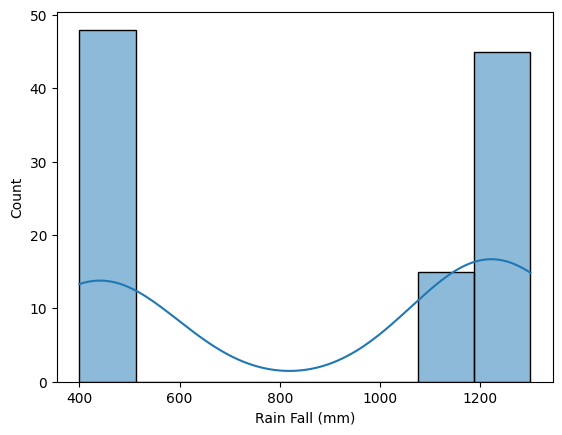

In [23]:
#Exploratory Data Analysis
#rainfall Distribution

sns.histplot(x = 'Rain Fall (mm)',data = df, kde = True)

Fertilizer Distribution


<Axes: xlabel='Fertilizer', ylabel='Count'>

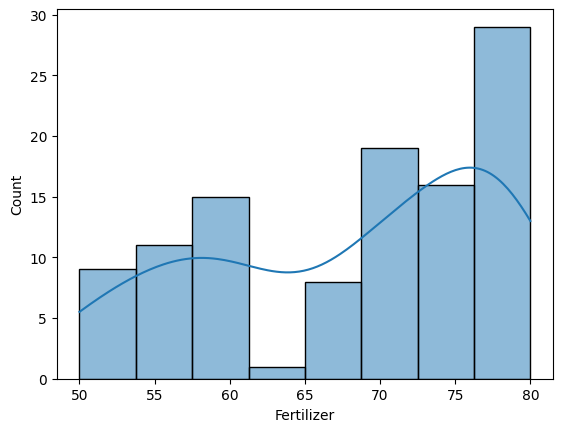

In [24]:
sns.histplot(x = 'Fertilizer',data = df, kde = True)

Temperature


<Axes: xlabel='Temperatue', ylabel='Count'>

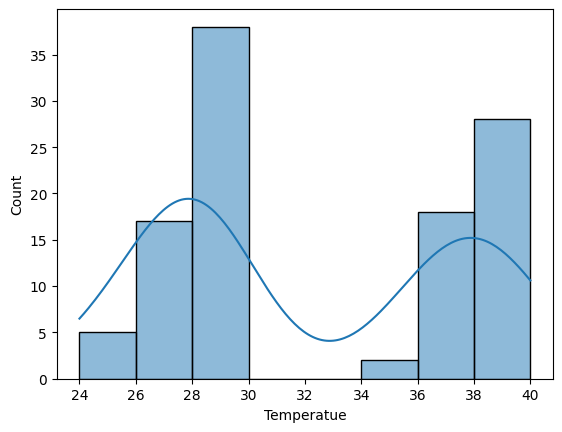

In [25]:
sns.histplot(x = 'Temperatue',data= df,kde =True)

Macronutirents Distribution


<Axes: xlabel='Potassium (K)', ylabel='Count'>

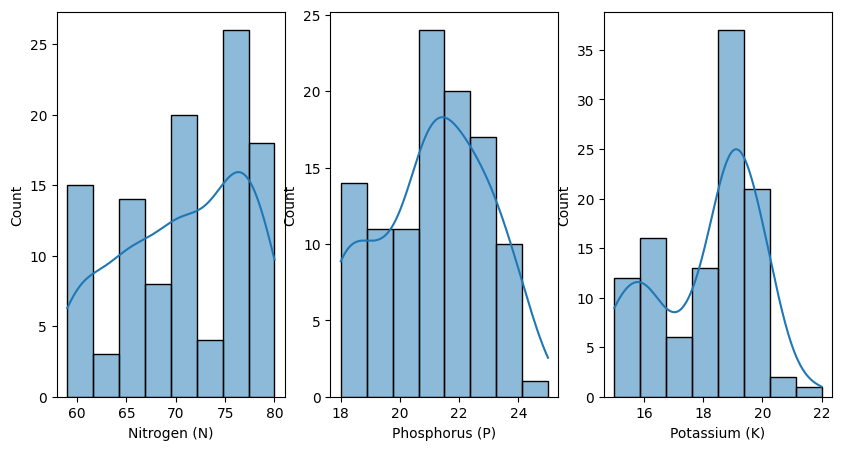

In [27]:
fig, ax = plt.subplots(1,3,figsize =(10,5))
sns.histplot(x = 'Nitrogen (N)', data=df,kde =True,ax = ax[0])
sns.histplot(x = 'Phosphorus (P)',data=df,kde = True,ax = ax[1])
sns.histplot(x ='Potassium (K)',data=df,kde=True,ax = ax[2])

Yield Distribution

<Axes: xlabel='Yeild (Q/acre)', ylabel='Count'>

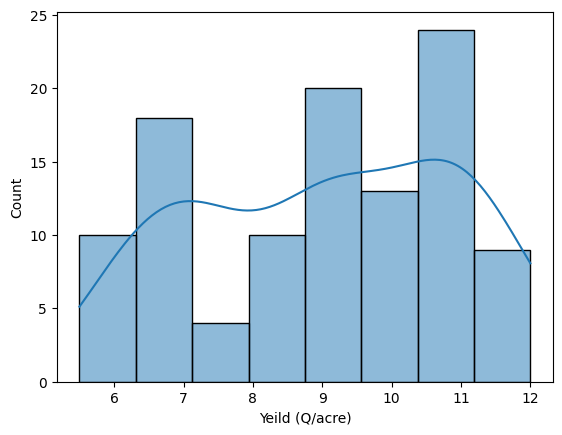

In [28]:
sns.histplot(x = "Yeild (Q/acre)", data = df, kde = True)


RainFall and Crop Yield

<Axes: xlabel='Rain Fall (mm)', ylabel='Yeild (Q/acre)'>

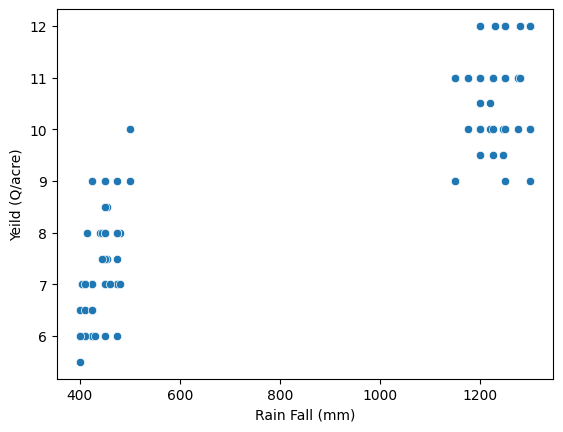

In [30]:
sns.scatterplot(x = 'Rain Fall (mm)', y = 'Yeild (Q/acre)',data = df)

Ferilizer and Crop Yield

<Axes: xlabel='Fertilizer', ylabel='Yeild (Q/acre)'>

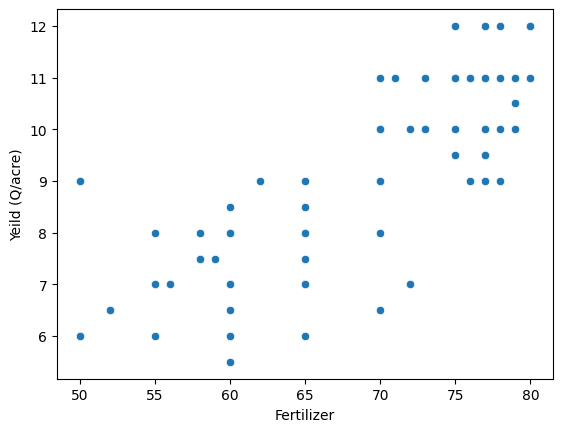

In [31]:
sns.scatterplot(x='Fertilizer',y = 'Yeild (Q/acre)', data = df)

Temperature and Crop Yield

<Axes: xlabel='Temperatue', ylabel='Yeild (Q/acre)'>

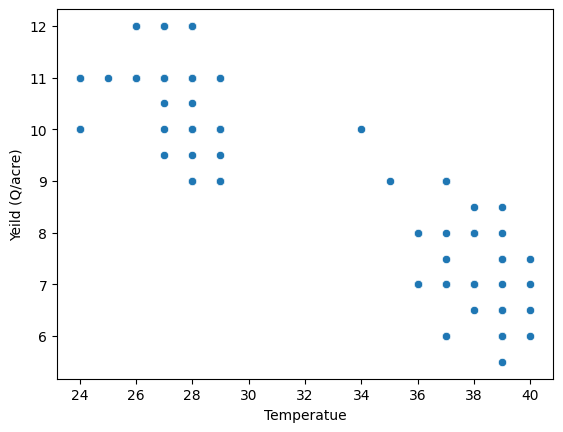

In [32]:
sns.scatterplot(x='Temperatue',y = 'Yeild (Q/acre)', data = df)


Macronutrients and Crop Yield

<Axes: xlabel='Potassium (K)', ylabel='Yeild (Q/acre)'>

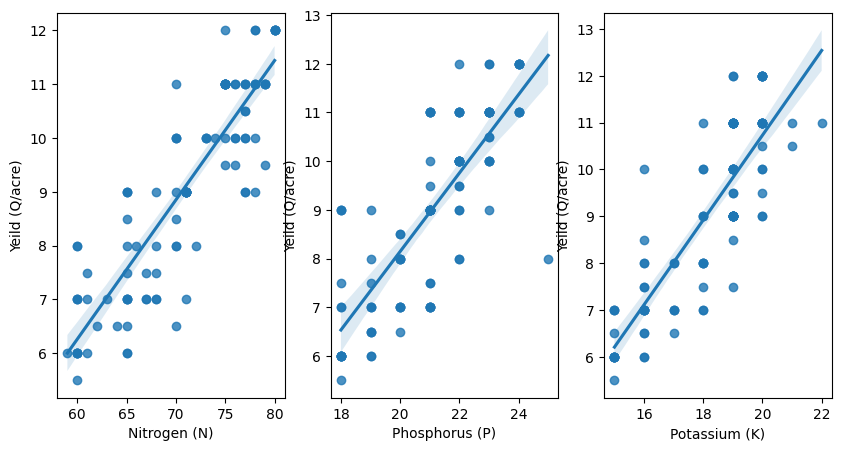

In [35]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
sns.regplot(x = 'Nitrogen (N)',y = 'Yeild (Q/acre)',data=df,ax = ax[0])
sns.regplot(x = 'Phosphorus (P)',y = 'Yeild (Q/acre)',data=df,ax = ax[1])
sns.regplot(x = 'Potassium (K)',y = 'Yeild (Q/acre)',data=df,ax = ax[2])

Correlation Matrix Heatmap

<Axes: >

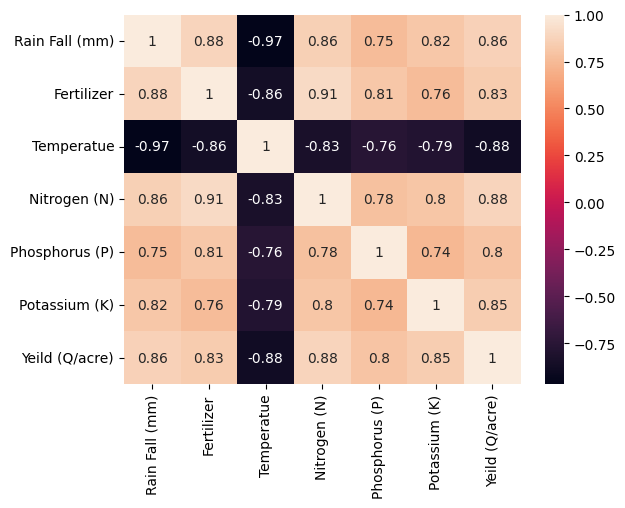

In [38]:
sns.heatmap(df.corr(), annot = True)


Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Yeild (Q/acre)',axis=1),df['Yeild (Q/acre)'],test_size = 0.2,random_state = 42)

Model Building
I will be using the following models to predict the crop yield:

Decision Tree Regressor
Random Forest Regressor

Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()


In [42]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(x_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [47]:

dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 8, random_state = 0)
dtr.fit(x_train, y_train)
print(dtr.score(x_train, y_train))
d_pred = dtr.predict(x_test)

0.9279431916668135


Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()


In [49]:
from sklearn.model_selection import GridSearchCV
para = {
    "n_estimators": [100,200,300],
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}
grid = GridSearchCV(rfr, para, cv=5, n_jobs = -1,verbose =1)
grid.fit(x_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 42}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [51]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 100, random_state = 42)

#fitting the model
rfr.fit(x_train, y_train)

#training score
print(rfr.score(x_train, y_train))

#prediction
r_pred = rfr.predict(x_test)

0.9355014219068669


/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_65548/2435593940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax =ax[0]).set_title('Decision Tree Regressor')
/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_65548/2435593940.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<Axes: title={'center': 'Random Forest Regressor'}, xlabel='Yeild (Q/acre)', ylabel='Density'>

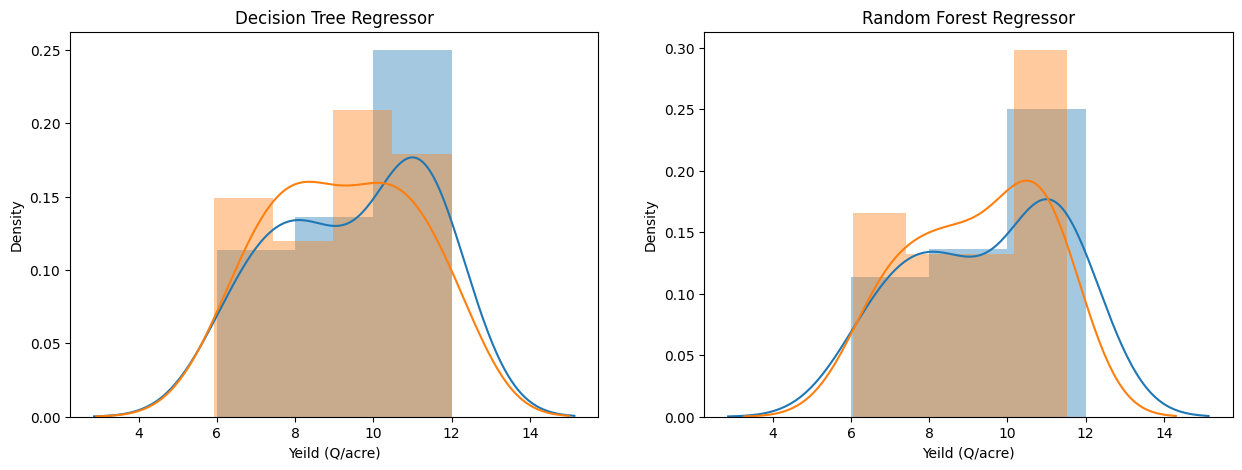

In [55]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(y_test, ax =ax[0]).set_title('Decision Tree Regressor')
sns.distplot(d_pred, ax = ax[0])

sns.distplot(y_test, ax = ax[1]).set_title('Random Forest Regressor')
sns.distplot(r_pred, ax = ax[1])

Evaluation Metrics

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Decision tree regressor")
print("mean squared error",mean_squared_error(y_test, d_pred))
print("mean absolute error",mean_absolute_error(y_test,d_pred))
print("r2 score:",r2_score(y_test,d_pred))
print("\n")
print("random forest regressor")
print("mean squared error",mean_squared_error(y_test, r_pred))
print("mean absolute error",mean_absolute_error(y_test,r_pred))
print("r2 score:",r2_score(y_test,r_pred))

Decision tree regressor
mean squared error 0.8250555099243105
mean absolute error 0.6832293523469994
r2 score: 0.7709296619513172


random forest regressor
mean squared error 0.7108302219107439
mean absolute error 0.6836246853366845
r2 score: 0.8026434375994264


Feature Importance


Text(0.5, 1.0, 'Random Forest Regressor')

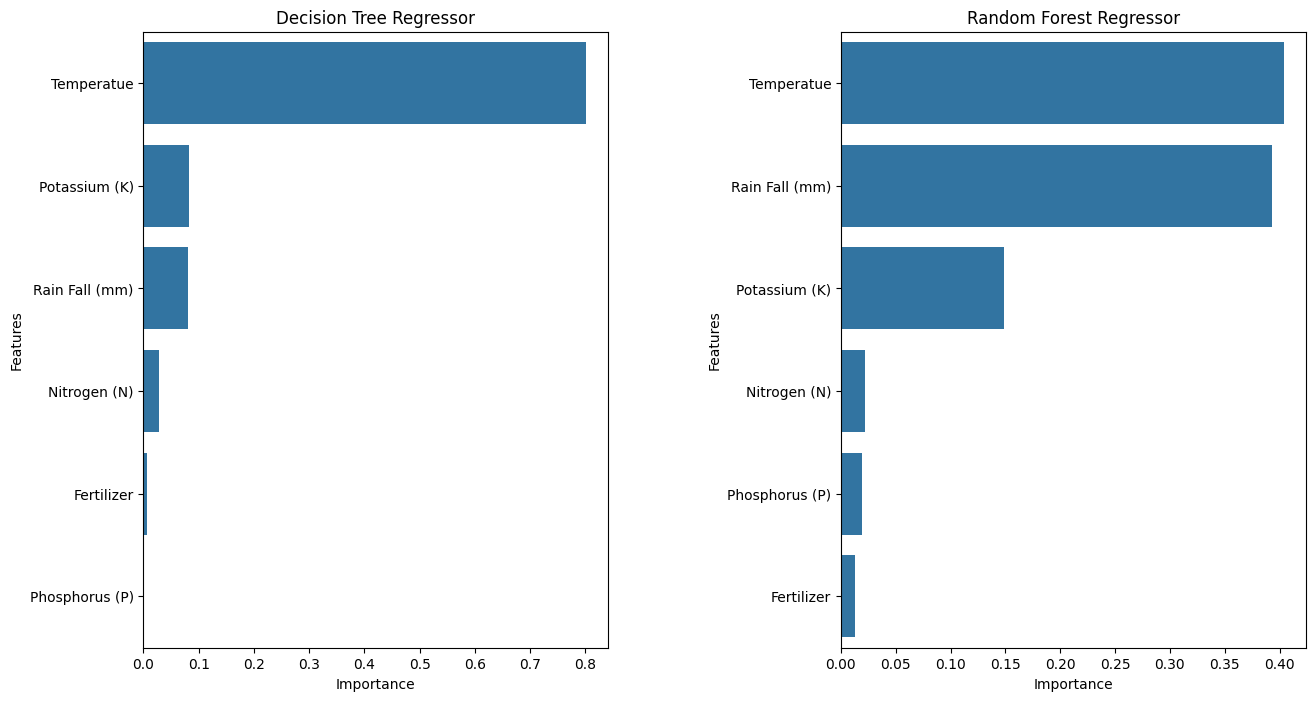

In [64]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':x_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':x_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

Conclusion
From the above analysis in the Exploratory Data Analysis, it is clear that there are two crops in the dataset, whose presence has been confirmed with presence of two definite clusters in the graphs of rainfall, temperature, and crop yield. The dataset has been collected for two different crops. The dataset has signs of proportional relationship between the nutrients and the crop yield. However, the relationship between the crop yield and the other columns is not directly proportional. This could be due to the other factors such as soil type, weather conditions, and crop breed. On the whole, the dataset is not much complex to make concrete decisions based on the graphs only.

Coming to the machine learning models, I have used Decision Tree Regressor and Random Forest Regressor to predict the crop yield. The Random Forest Regressor has performed better than the Decision Tree Regressor. The Random Forest Regressor has a R2 score of 0.802 and the Decision Tree Regressor has r2 score of 0.77. From the feature importance graph, we can see that the temperature has the highest importance in predicting the crop yield. The temperature is followed by the rainfall, however the macro nutrients tend to have comparatively less importance in predicting the crop yield.